In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Creating the dataset

Let us start by creating a dataset representing a noisy cubic polynomial with equation $-0.2 x^3 + \mu$, where $\mu \sim \mathcal{N}(0, 2)$

In [2]:
np.random.seed(42)
X = (np.random.rand(100,1) - 0.5) * 10
y = -0.2 * X**3 + np.random.normal(loc=0, scale=2, size=[100,1])

Let's plot it

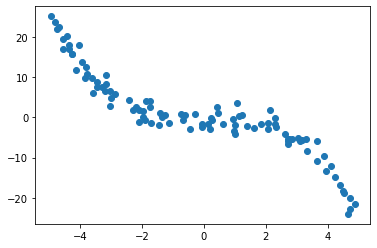

In [3]:
plt.scatter(X,y)

We need the data to be in homogeneous coordinates...

In [4]:
XX = np.column_stack([X, np.ones(shape=[len(X), 1])])

# Define the least square "solver"
$w = (X^T X)^{-1} X^T y$

In [5]:
def least_squares(X,y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

Apply it to our data

In [6]:
ww = least_squares(XX, y)

It's time to plot results, let start by generating new points in the interval $[-5,5]$ and compute the $y$ using the solution found by least squares.

In [7]:
xs = np.linspace(-5, 5)
ys = ww[0]* xs +ww[1]

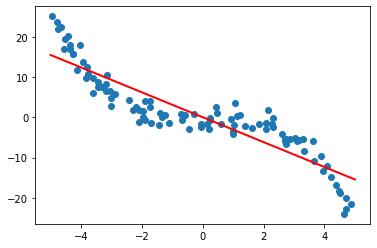

In [8]:
plt.scatter(X,y)
plt.plot(xs, ys, c='r', lw=2)


# Solving a non-linear problem using the "slow" kernel trick

We will use the sklearn PolynomialFeatures class to preprocess our data mapping them into a "polynomial space". We will need a space able to represent all polynomials of degree 3.

In [9]:
polyfeatures = PolynomialFeatures(degree=3, include_bias=True)
polyX = polyfeatures.fit_transform(X)

Now we can use our `least_squares` solver to find a solution in the transformed space...

In [10]:
polyww = least_squares(polyX, y)

Generate new data to plot the solution (again, using `linspace` to generate points in the interval $[-5,5]$).

In [11]:
xs = np.linspace(-5, 5, 100).reshape(-1,1)
polyxs = polyfeatures.transform(xs)
polyys = polyxs @ polyww

We can now plot the data and our solution

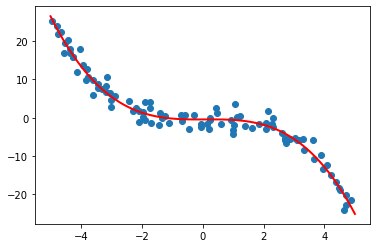

In [12]:
plt.scatter(X,y)
plt.plot(xs, polyys, c='r',lw=2)

## This Kernel trick is slow!

In [13]:
import time

X = np.random.rand(100, 13)
results_degrees = []
results_time = []

for i in range(13):
    poly = PolynomialFeatures(degree=i+1)
    
    start = time.time()
    polyX = poly.fit_transform(X)
    end = time.time()

    results_degrees.append(i+1)
    results_time.append(end-start)

    print("{} \t Num features {:10d} Time {:2.4f}s".format(i+1, polyX.shape[1], end-start))


1 	 Num features         14 Time 0.0000s
2 	 Num features        105 Time 0.0000s
3 	 Num features        560 Time 0.0010s
4 	 Num features       2380 Time 0.0010s
5 	 Num features       8568 Time 0.0050s
6 	 Num features      27132 Time 0.0110s
7 	 Num features      77520 Time 0.0230s
8 	 Num features     203490 Time 0.0470s
9 	 Num features     497420 Time 0.1031s
10 	 Num features    1144066 Time 0.2562s
11 	 Num features    2496144 Time 0.5495s
12 	 Num features    5200300 Time 1.0696s
13 	 Num features   10400600 Time 2.1218s


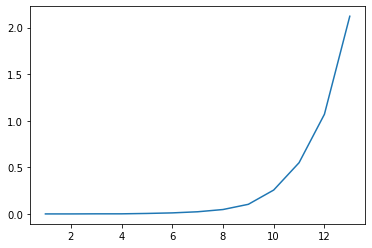

In [14]:
plt.plot(results_degrees, results_time)